<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 10** | Python: Projeto Final
Caderno de **Aula**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

Aluno [Roberto Hatiro Nishiyama](https://www.linkedin.com/in/rhatiro/)<br>
Data: 26 de janeiro de 2023.

---

# 0\. Análise de dados de crédito entre clientes adimplentes e inadimplentes



**Projeto final do curso Python para Análise de Dados ministrado pela EBAC**

*Módulo 10*

## 1\. Breve descrição do problema

Serão explorados dados de crédito do arquivo `Python_M10_support material.csv` disponibilizado na plataforma do curso para este projeto. 
Esta base de dados também pode ser encontrada através deste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv).

Os dados estão no formato CSV e contêm informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de `default` que indica se um cliente é adimplente (default == 0) ou inadimplente (default == 1), ou seja, queremos entender o motivo de um cliente deixar de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade ou movimentação financeira. 

Uma descrição completa dos atributos está abaixo:

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta bancária |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | 26 a 73 anos |
| sexo    | F ou M |
| depedentes | 0 a 5 |
| escolaridade | Sem educação formal, ensino médio, graduação, mestrado ou doutorado |
| estado_civil | Solteiro, casado ou divorciado |
| salario_anual | Faixa do salário mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartão: blue, silver, gold ou platinum |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iterações com o cliente no último ano |
| meses_inativo_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

## 2\. Código de importação de bibliotecas

PEP 8 - Imports: https://peps.python.org/pep-0008/#imports

In [1]:
# 1. Standard library imports:

# 2. Related third party imports:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Local application/library specific imports:


## 3\. Download/carregamento/geração de dados

In [2]:
df = pd.read_csv('/content/Python_M10_support material.csv', na_values='na')

## 4\. Exploração dos dados

In [3]:
# Visualização geral das 5 primeiras e 5 últimas linhas do dataframe:

df

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,NaN,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,NaN,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62


In [4]:
# Visualização das 3 primeiras linhas do dataframe:

df.head(n=3)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20


In [5]:
# Quantidade total de linhas e colunas:

qtd_linhas_total, qtd_colunas_total = df.shape

print(f'Quantidade total de linhas: {qtd_linhas_total}')
print(f'Quantidade total de colunas: {qtd_colunas_total}')

Quantidade total de linhas: 10127
Quantidade total de colunas: 16


In [6]:
# Quantidade de linhas e colunas filtradas pelo atributo de interesse `default` sendo 0 = Adimplente

qtd_linhas_adimplentes, qtd_colunas_adimplentes = df[df['default'] == 0].shape

print(f'Quantidade de linhas dos clientes adimplentes: {qtd_linhas_adimplentes}')
print(f'Quantidade de colunas dos clientes inadimplentes: {qtd_colunas_adimplentes}')

Quantidade de linhas dos clientes adimplentes: 8500
Quantidade de colunas dos clientes inadimplentes: 16


In [7]:
# Quantidade de linhas e colunas filtradas pelo atributo de interesse `default` sendo 1 = Inadimplente

qtd_linhas_inadimplentes, qtd_colunas_inadimplentes = df[df['default'] == 1].shape

print(f'Quantidade de linhas dos clientes adimplentes: {qtd_linhas_inadimplentes}')
print(f'Quantidade de colunas dos clientes inadimplentes: {qtd_colunas_inadimplentes}')

Quantidade de linhas dos clientes adimplentes: 1627
Quantidade de colunas dos clientes inadimplentes: 16


In [8]:
# Relação percentual de cada variável resposta pela quantidade total de valores da coluna:

print(f'A proporção de clientes adimplentes é de {round(qtd_linhas_adimplentes / qtd_linhas_total * 100, 2)}%.')
print(f'A proporção de clientes inadimplentes é de {round(qtd_linhas_inadimplentes / qtd_linhas_total * 100, 2)}%.')

A proporção de clientes adimplentes é de 83.93%.
A proporção de clientes inadimplentes é de 16.07%.


## 5\. *DATA WRANGLING*: Transformação e limpeza dos dados

> Etapa de transformação e limpeza dos dados do conjunto para que possam ser melhor analisados:

 - Correção do *schema* das colunas;
 - Remoção dos dados faltantes.

### 5.1. Schema

In [9]:
# Checando o tipo de variável de cada coluna e seus respectivos dados:

df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [10]:
# Descrição dos atributos categóricos:

df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


Note que as colunas `escolaridade`, `estado_civil` e `salario_anual` apresentaram a cotagem do número de linhas menor que 10127. Possívelmente faltam dados conforme veremos mais a baixo.

In [11]:
# Descrição dos atributos numéricos sem considerar a coluna 'id':

df.drop(labels='id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### 5.2. Correção de *schema*

In [12]:
# Checando novamente os tipos de dados de cada coluna:

df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [13]:
# Checando os valores das primeiras linhas para verificar conforme os tipos apresentados na célula acima:

df.head().transpose()

,0,1,2,3,4
id,768805383,818770008,713982108,769911858,709106358
default,0,0,0,0,0
idade,45,49,51,40,40
sexo,M,F,M,F,M
dependentes,3,5,3,4,3
escolaridade,ensino medio,mestrado,mestrado,ensino medio,sem educacao formal
estado_civil,casado,solteiro,casado,NaN,casado
salario_anual,$60K - $80K,menos que $40K,$80K - $120K,menos que $40K,$60K - $80K
tipo_cartao,blue,blue,blue,blue,blue
meses_de_relacionamento,39,44,36,34,21


In [14]:
# Função para corrigir o 'schema' e alterar os caracteres de acordo com o padrão numérico:

corrigir_schema = lambda linha: float(linha.replace('.', '').replace(',', '.'))

for coluna in ['limite_credito', 'valor_transacoes_12m']:

  print(f"Coluna '{coluna}' antes: {df[coluna].dtypes}")
  print(f'Primeira linha: {df[coluna][0]}')

  df[coluna] = df[coluna].apply(corrigir_schema)
  
  print(f"Coluna '{coluna}' depois: {df[coluna].dtypes}")
  print(f'Primeira linha: {df[coluna][0]}')

  print()

Coluna 'limite_credito' antes: object
Primeira linha: 12.691,51
Coluna 'limite_credito' depois: float64
Primeira linha: 12691.51

Coluna 'valor_transacoes_12m' antes: object
Primeira linha: 1.144,90
Coluna 'valor_transacoes_12m' depois: float64
Primeira linha: 1144.9



In [15]:
# Checando o resultado das alterações:

df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

### 5.3. Remoção dos dados faltantes (*missing values*)

In [16]:
# Checando os dados faltantes nas colunas em qualquer linha:

df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [17]:
# Descrição dos atributos categóricos:

df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [18]:
# Descrição dos atributos numéricos:

df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


In [19]:
# Exemplo de dataframe com filtro das linhas com dados faltantes:

df[df['escolaridade'].isna()].head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,34516.72,1330.87,31
11,710821833,0,65,M,1,NaN,casado,$40K - $60K,blue,54,6,3,2,9095.59,1314.42,26
15,714885258,0,44,M,4,NaN,NaN,$80K - $120K,blue,37,5,2,1,4234.96,1348.10,27
17,753327333,0,41,M,3,NaN,casado,$80K - $120K,blue,34,4,1,4,13535.91,1028.75,21
23,811604133,0,47,F,4,NaN,solteiro,menos que $40K,blue,36,3,2,3,2492.08,1126.97,23


In [20]:
# Função para descrever a quantidade de dados faltantes das colunas em relação a quantidade total:

def descrever_dados_faltantes(df: pd.DataFrame) -> None:
  
  dados_faltantes = list()
  for coluna in df.columns:
    if df[coluna].isna().any():
      quantidade_faltante_coluna, _ = df[df[coluna].isna()].shape
      quantidade_faltante_total, _ = df.shape
      resultado_dados_faltantes = {
          coluna: {'quantidade de dados faltantes': f'{quantidade_faltante_coluna} linhas', 
                   '% em relação ao total': f'{round(quantidade_faltante_coluna/quantidade_faltante_total * 100, 2)}%'}
                   }
      dados_faltantes.append(resultado_dados_faltantes)

  print(f'Quantidade total de linhas: {df.shape[0]}\n')

  for resultado in dados_faltantes:
    print(resultado)

In [21]:
# Quantidade total de linhas nas colunas com dados faltantes:

descrever_dados_faltantes(df=df)

Quantidade total de linhas: 10127

{'escolaridade': {'quantidade de dados faltantes': '1519 linhas', '% em relação ao total': '15.0%'}}
{'estado_civil': {'quantidade de dados faltantes': '749 linhas', '% em relação ao total': '7.4%'}}
{'salario_anual': {'quantidade de dados faltantes': '1112 linhas', '% em relação ao total': '10.98%'}}


In [22]:
# Quantidade de linhas nas colunas com dados faltantes dos clientes adimplentes:

descrever_dados_faltantes(df=df[df['default'] == 0])

Quantidade total de linhas: 8500

{'escolaridade': {'quantidade de dados faltantes': '1263 linhas', '% em relação ao total': '14.86%'}}
{'estado_civil': {'quantidade de dados faltantes': '620 linhas', '% em relação ao total': '7.29%'}}
{'salario_anual': {'quantidade de dados faltantes': '925 linhas', '% em relação ao total': '10.88%'}}


In [23]:
# Quantidade de linhas nas colunas com dados faltantes dos clientes inadimplentes:

descrever_dados_faltantes(df=df[df['default'] == 1])

Quantidade total de linhas: 1627

{'escolaridade': {'quantidade de dados faltantes': '256 linhas', '% em relação ao total': '15.73%'}}
{'estado_civil': {'quantidade de dados faltantes': '129 linhas', '% em relação ao total': '7.93%'}}
{'salario_anual': {'quantidade de dados faltantes': '187 linhas', '% em relação ao total': '11.49%'}}


Com os resultados acima nota-se que a proporção de dados faltantes é semelhante.

Removeremos então as linhas com os dados faltantes e verificaremos novamente a proporção:

In [24]:
df.dropna(inplace=True)
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade               False
estado_civil               False
salario_anual              False
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [25]:
# Checando a nova quantidade de linhas e colunas após a remoção:

df.shape

(7081, 16)

In [26]:
# Checando a nova quantidade de linhas dos adimplentes após a remoção:

df[df['default'] == 0].shape

(5968, 16)

In [27]:
# Checando a nova quantidade de linhas dos inadimplentes após a remoção:

df[df['default'] == 1].shape

(1113, 16)

In [28]:
# Checando e comparando as quantidades após a remoção:

print('Quantidade original de linhas:\n')

qtd_original = {'qtd_linhas_total': qtd_linhas_total, 
                'qtd_linhas_adimplentes': qtd_linhas_adimplentes, 
                'qtd_linhas_inadimplentes': qtd_linhas_inadimplentes}

for key, value in qtd_original.items():
  print(f'{key}: {value}')

print('\nQuantidade após remoção das linhas com dados faltantes:\n')

qtd_dropna = {'qtd_linhas_total_dropna': df.shape[0],
              'qtd_linhas_adimplentes_dropna': df[df['default'] == 0].shape[0], 
              'qtd_linhas_inadimplentes_dropna': df[df['default'] == 1].shape[0]}

for key, value in qtd_dropna.items():
  print(f'{key}: {value}')

Quantidade original de linhas:

qtd_linhas_total: 10127
qtd_linhas_adimplentes: 8500
qtd_linhas_inadimplentes: 1627

Quantidade após remoção das linhas com dados faltantes:

qtd_linhas_total_dropna: 7081
qtd_linhas_adimplentes_dropna: 5968
qtd_linhas_inadimplentes_dropna: 1113


In [29]:
# Comparando as proporções antes e após a remoção das linhas com dados faltantes:

adimplentes_original = round(qtd_linhas_adimplentes/qtd_linhas_total * 100, 2)
adimplentes_dropna = round(qtd_dropna["qtd_linhas_adimplentes_dropna"] 
                           / qtd_dropna["qtd_linhas_total_dropna"] * 100, 2)

print(f'A proporção original de adimplentes era de {adimplentes_original}%')
print(f'A nova proporção de adimplentes é de {adimplentes_dropna}%')
print(f'Diferença de {abs(round(adimplentes_dropna - adimplentes_original, 2))}%')

print()
inadimplentes_original = round(qtd_linhas_inadimplentes/qtd_linhas_total * 100, 2)
inadimplentes_dropna = round(qtd_dropna["qtd_linhas_inadimplentes_dropna"] 
                             / qtd_dropna["qtd_linhas_total_dropna"] * 100, 2)

print(f'A proporção original de inadimplentes era de {inadimplentes_original}%')
print(f'A nova proporção de inadimplentes é de {inadimplentes_dropna}%')
print(f'Diferença de {abs(round(inadimplentes_dropna - inadimplentes_original, 2))}%')

A proporção original de adimplentes era de 83.93%
A nova proporção de adimplentes é de 84.28%
Diferença de 0.35%

A proporção original de inadimplentes era de 16.07%
A nova proporção de inadimplentes é de 15.72%
Diferença de 0.35%


## 6\. Análise e visualização dos dados

In [30]:
# Definindo estilo da visualização do seaborn:

sns.set_style('darkgrid')

In [31]:
# Definindo as variáveis de cada dataframe que será utilizado para visualização:

df = df  # Dataframe completo
df_adimplentes = df[df['default'] == 0]  # Dataframe somente com clientes adimplentes
df_inadimplentes = df[df['default'] == 1]  # Dataframe somente com clientes inadimplentes

### 6.1. Visualizações dos dados categóricos

In [32]:
# Atributos categóricos:

df.select_dtypes('object').head(n=3)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue


In [33]:
# Exemplo de contagem dos valores ao agrupar os dados da coluna:

df['escolaridade'].value_counts()

mestrado               2591
ensino medio           1653
sem educacao formal    1204
graduacao               844
doutorado               789
Name: escolaridade, dtype: int64

In [34]:
df['escolaridade'].value_counts().to_frame()

,escolaridade
mestrado,2591
ensino medio,1653
sem educacao formal,1204
graduacao,844
doutorado,789


In [35]:
# Visualização do index:

df['escolaridade'].value_counts().to_frame().index

Index(['mestrado', 'ensino medio', 'sem educacao formal', 'graduacao',
       'doutorado'],
      dtype='object')

In [36]:
# Descrição:

df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,7081,2,M,3706
escolaridade,7081,5,mestrado,2591
estado_civil,7081,3,casado,3564
salario_anual,7081,5,menos que $40K,2792
tipo_cartao,7081,4,blue,6598


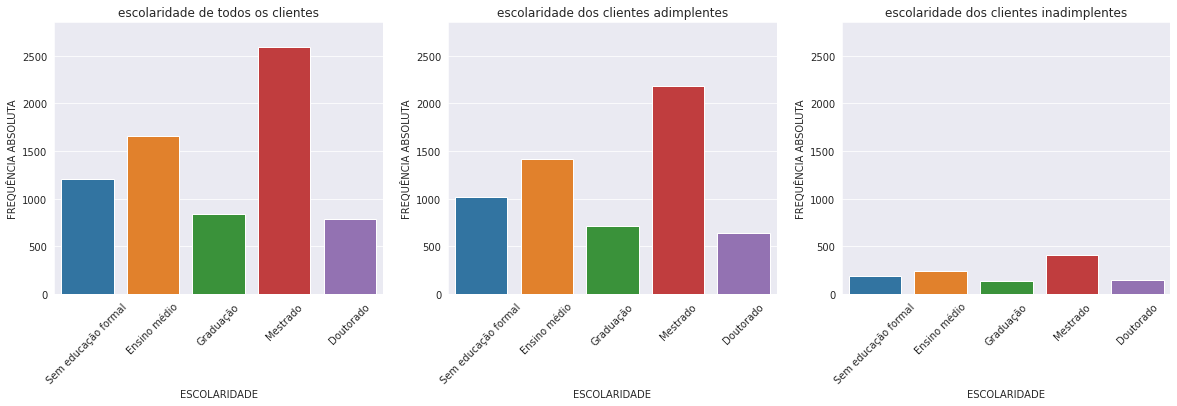

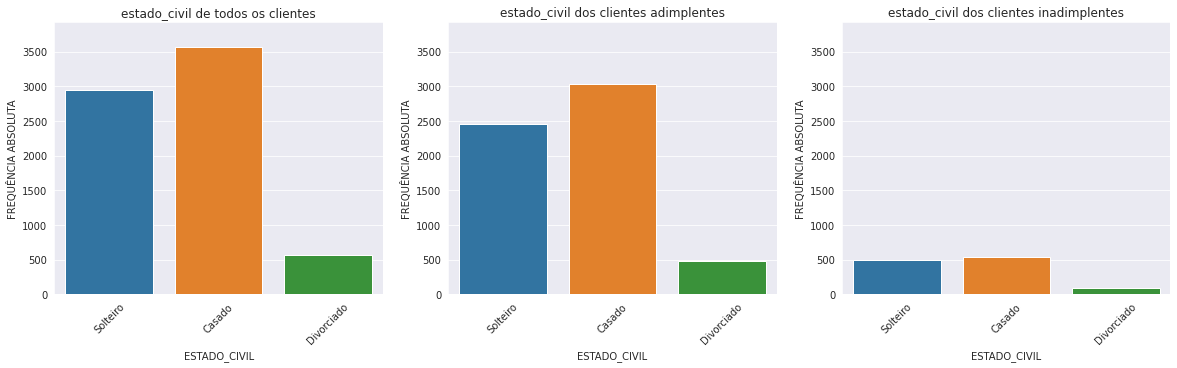

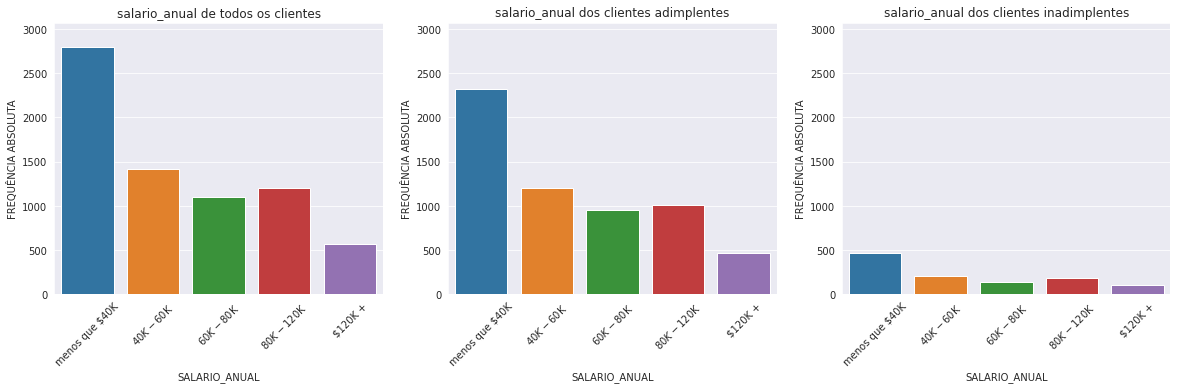

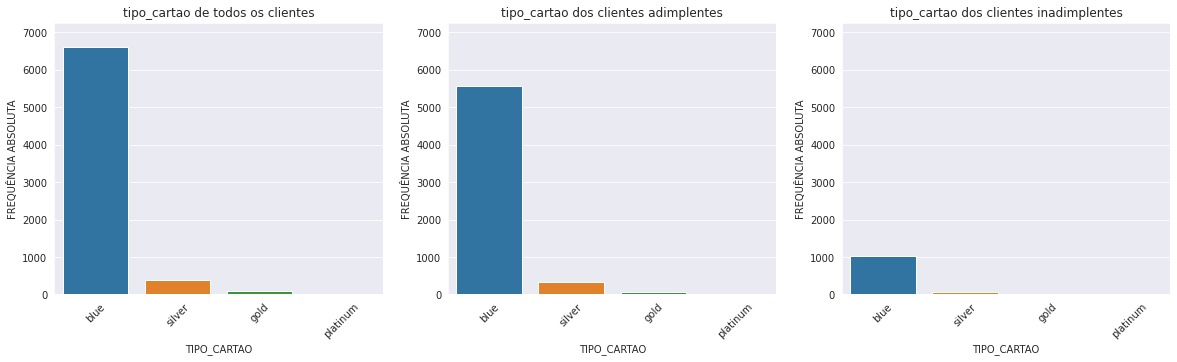

In [37]:
# Visualização:

for coluna in df.drop(labels='sexo', axis=1).select_dtypes('object'):

  titulos = [
      f'{coluna} de todos os clientes', 
      f'{coluna} dos clientes adimplentes', 
      f'{coluna} dos clientes inadimplentes'
      ]

  eixo = 0
  max_y = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

  figura, eixos = plt.subplots(
      nrows=1, 
      ncols=3, 
      figsize=(20, 5)
      )  # reorna tupla: 1=figura , 2=eixos

  for dataframe in [df, df_adimplentes, df_inadimplentes]:

    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(
        columns={coluna: 'frequencia_absoluta'}, 
        inplace=True
        )  # Renomeando o nome da coluna 'escolaridade' para 'frequencia_absoluta'
    df_to_plot[coluna] = df_to_plot.index  # Criando coluna com valores == index
    # Ordenar em formato customizado pelo index:
    if coluna == 'escolaridade':
      df_to_plot = df_to_plot.reindex([
          'sem educacao formal', 
          'ensino medio', 
          'graduacao', 
          'mestrado', 
          'doutorado'
          ])
    elif coluna == 'estado_civil':
      df_to_plot = df_to_plot.reindex(['solteiro', 'casado', 'divorciado'])
    elif coluna == 'salario_anual':
      df_to_plot.reset_index(inplace=True, drop=True)
      df_to_plot = df_to_plot.reindex([0, 1, 3, 2, 4])

    f = sns.barplot(
        x=df_to_plot[coluna], 
        y=df_to_plot['frequencia_absoluta'], 
        ax=eixos[eixo]
        )  # Definindo os eixos x e y
    f.set(
        title=titulos[eixo], 
        xlabel=coluna.upper(), 
        ylabel='FREQUÊNCIA ABSOLUTA'
        )  # Definindo o título principal e dos eixos x e y
    # Definindo as legendas de cada coluna:
    if coluna == 'escolaridade':
      f.set_xticklabels(
          labels=[
              'Sem educação formal', 
              'Ensino médio', 
              'Graduação', 
              'Mestrado', 
              'Doutorado'
              ], 
          rotation=45
          )
    elif coluna == 'estado_civil':
      f.set_xticklabels(
          labels=['Solteiro', 'Casado', 'Divorciado'], 
          rotation=45
          )
    elif (coluna == 'salario_anual') | (coluna == 'tipo_cartao'):
      f.set_xticklabels(
          labels=f.get_xticklabels(), 
          rotation=45
          )

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

  figura.show()

### 6.2. Viualizações dos dados numéricos

In [38]:
# Atributos numéricos:

df.drop(labels='id', axis=1).select_dtypes('number').dtypes

default                      int64
idade                        int64
dependentes                  int64
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [39]:
# Cinco primeiras linhas do dataframe filtrado:

df.drop(labels='id', axis=1).select_dtypes('number').head().transpose()

,0,1,2,4,5
default,0.00,0.00,0.00,0.00,0.00
idade,45.00,49.00,51.00,40.00,44.00
dependentes,3.00,5.00,3.00,3.00,2.00
meses_de_relacionamento,39.00,44.00,36.00,21.00,36.00
qtd_produtos,5.00,6.00,4.00,5.00,3.00
iteracoes_12m,3.00,2.00,0.00,0.00,2.00
meses_inativo_12m,1.00,1.00,1.00,1.00,1.00
limite_credito,12691.51,8256.96,3418.56,4716.22,4010.69
valor_transacoes_12m,1144.90,1291.45,1887.72,816.08,1088.07
qtd_transacoes_12m,42.00,33.00,20.00,28.00,24.00


In [40]:
# Descrição numérica de todos os clientes:

df.drop(labels='id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,7081.0,0.157181,0.363997,0.00,0.00,0.00,0.00,1.00
idade,7081.0,46.347691,8.041225,26.00,41.00,46.00,52.00,73.00
dependentes,7081.0,2.337805,1.291649,0.00,1.00,2.00,3.00,5.00
meses_de_relacionamento,7081.0,35.981359,8.002609,13.00,31.00,36.00,40.00,56.00
qtd_produtos,7081.0,3.819376,1.544444,1.00,3.00,4.00,5.00,6.00
iteracoes_12m,7081.0,2.454456,1.104917,0.00,2.00,2.00,3.00,6.00
meses_inativo_12m,7081.0,2.342607,0.995104,0.00,2.00,2.00,3.00,6.00
limite_credito,7081.0,8493.259524,9126.082105,1438.00,2498.35,4287.22,10729.40,34516.99
valor_transacoes_12m,7081.0,4394.800669,3468.457771,510.16,2089.63,3831.09,4740.51,17995.49
qtd_transacoes_12m,7081.0,64.503319,23.809330,10.00,44.00,67.00,80.00,134.00


In [41]:
# Descrição numérica dos clientes adimplentes:

df[df['default'] == 0].drop(labels='id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,5968.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.00
idade,5968.0,46.317359,8.092984,26.00,41.0000,46.000,52.0000,73.00
dependentes,5968.0,2.331434,1.293032,0.00,1.0000,2.000,3.0000,5.00
meses_de_relacionamento,5968.0,35.949397,8.020490,13.00,31.0000,36.000,40.0000,56.00
qtd_produtos,5968.0,3.916555,1.515820,1.00,3.0000,4.000,5.0000,6.00
iteracoes_12m,5968.0,2.361930,1.085288,0.00,2.0000,2.000,3.0000,5.00
meses_inativo_12m,5968.0,2.276977,1.001688,0.00,2.0000,2.000,3.0000,6.00
limite_credito,5968.0,8555.587349,9116.518156,1438.01,2560.0975,4349.465,10853.6175,34516.99
valor_transacoes_12m,5968.0,4635.007929,3587.381325,816.08,2246.8975,4048.600,4775.8550,17995.49
qtd_transacoes_12m,5968.0,68.176441,23.318695,11.00,52.0000,70.000,82.0000,134.00


In [42]:
# Descrição numérica dos clientes inadimplentes:

df[df['default'] == 1].drop(labels='id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1113.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
idade,1113.0,46.510332,7.759314,26.00,41.00,46.00,52.00,68.00
dependentes,1113.0,2.371968,1.284245,0.00,1.00,2.00,3.00,5.00
meses_de_relacionamento,1113.0,36.152740,7.907402,13.00,32.00,36.00,41.00,56.00
qtd_produtos,1113.0,3.298293,1.592182,1.00,2.00,3.00,5.00,6.00
iteracoes_12m,1113.0,2.950584,1.077184,0.00,2.00,3.00,4.00,6.00
meses_inativo_12m,1113.0,2.694519,0.879491,0.00,2.00,3.00,3.00,6.00
limite_credito,1113.0,8159.052462,9174.085337,1438.00,2053.06,4116.79,9943.21,34516.98
valor_transacoes_12m,1113.0,3106.789057,2359.711453,510.16,1867.49,2309.42,2811.91,10583.79
qtd_transacoes_12m,1113.0,44.807727,15.191963,10.00,37.00,43.00,51.00,91.00


In [43]:
# Correlação

df.corr()

,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
id,1.000000,-0.041033,0.015073,-0.010983,0.139073,0.004544,0.012772,0.013938,-0.000263,-0.025341,-0.006345
default,-0.041033,1.000000,0.008735,0.011423,0.009249,-0.145713,0.193923,0.152732,-0.015816,-0.160379,-0.357261
idade,0.015073,0.008735,1.000000,-0.128232,0.791271,-0.022067,-0.023971,0.057870,0.024563,-0.045859,-0.069883
dependentes,-0.010983,0.011423,-0.128232,1.000000,-0.112368,-0.043257,-0.055625,-0.022804,0.081378,0.023234,0.057056
meses_de_relacionamento,0.139073,0.009249,0.791271,-0.112368,1.000000,-0.016751,-0.011054,0.071305,0.020103,-0.037625,-0.050445
qtd_produtos,0.004544,-0.145713,-0.022067,-0.043257,-0.016751,1.000000,0.070539,0.005072,-0.074876,-0.348024,-0.246749
iteracoes_12m,0.012772,0.193923,-0.023971,-0.055625,-0.011054,0.070539,1.000000,0.026269,0.016737,-0.121018,-0.155612
meses_inativo_12m,0.013938,0.152732,0.057870,-0.022804,0.071305,0.005072,0.026269,1.000000,-0.015728,-0.039977,-0.048169
limite_credito,-0.000263,-0.015816,0.024563,0.081378,0.020103,-0.074876,0.016737,-0.015728,1.000000,0.171592,0.080834
valor_transacoes_12m,-0.025341,-0.160379,-0.045859,0.023234,-0.037625,-0.348024,-0.121018,-0.039977,0.171592,1.000000,0.810074


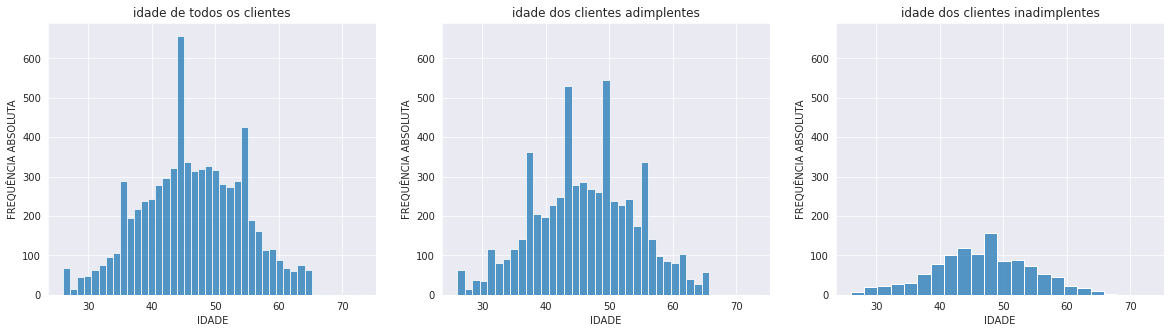

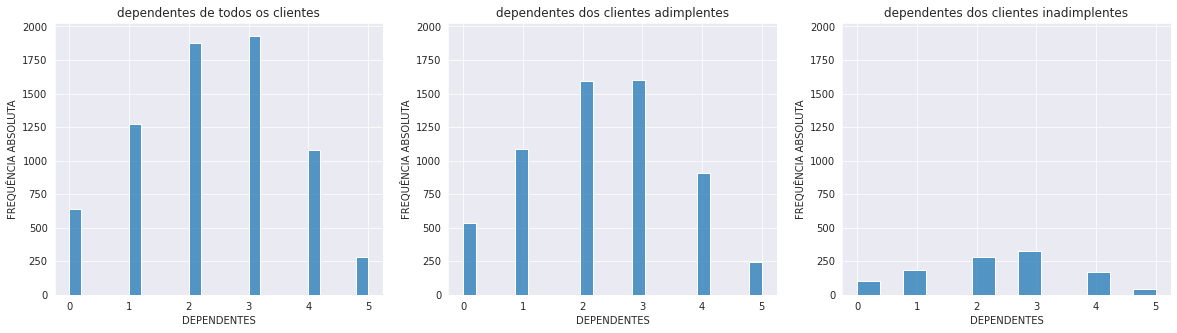

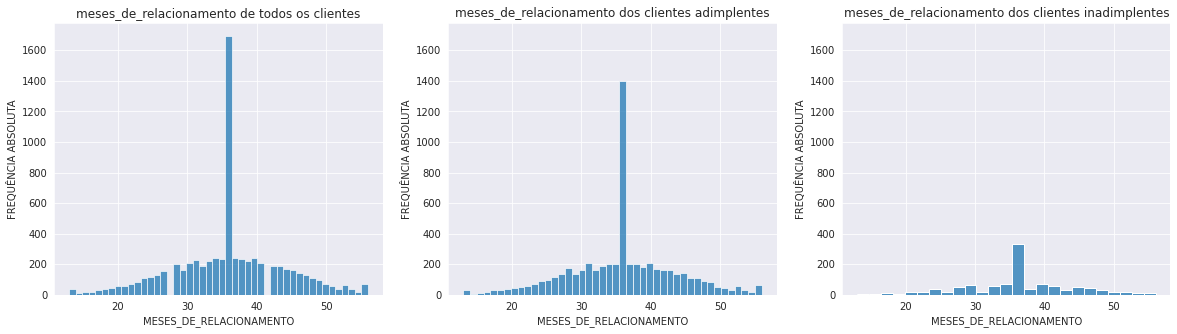

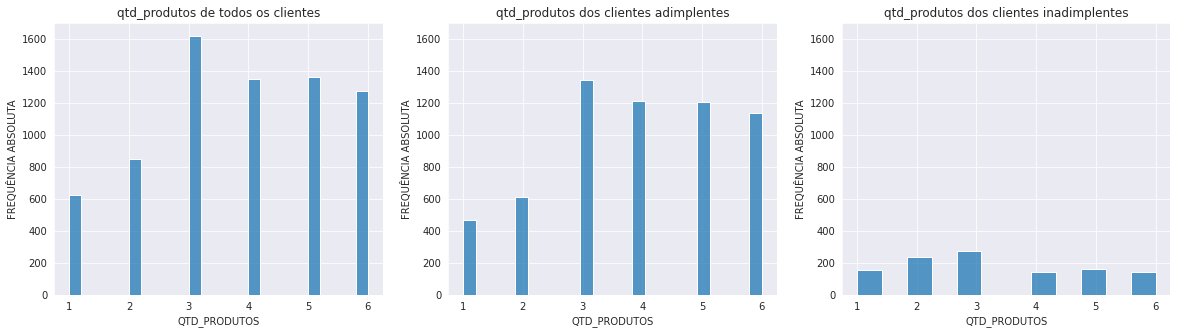

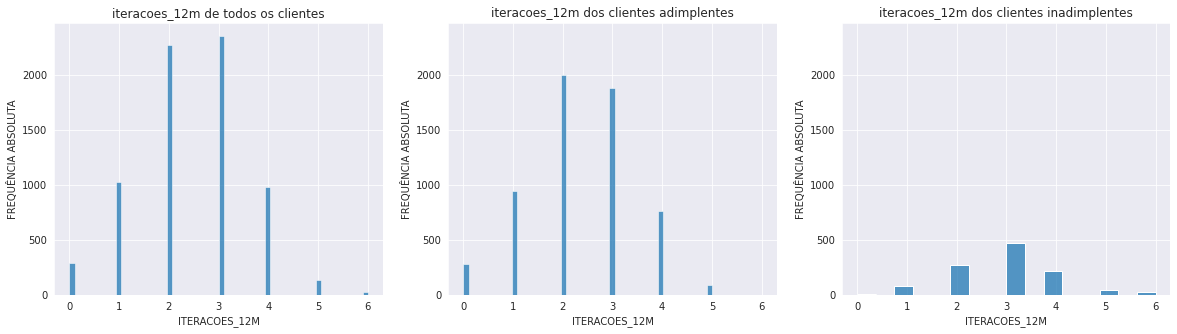

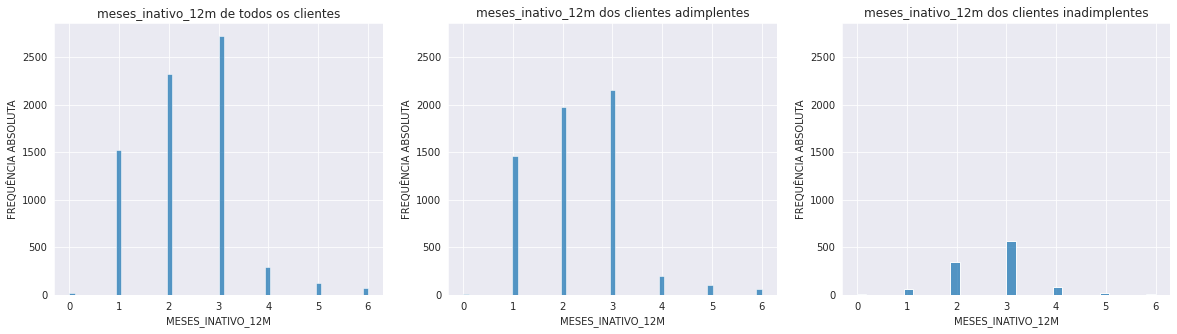

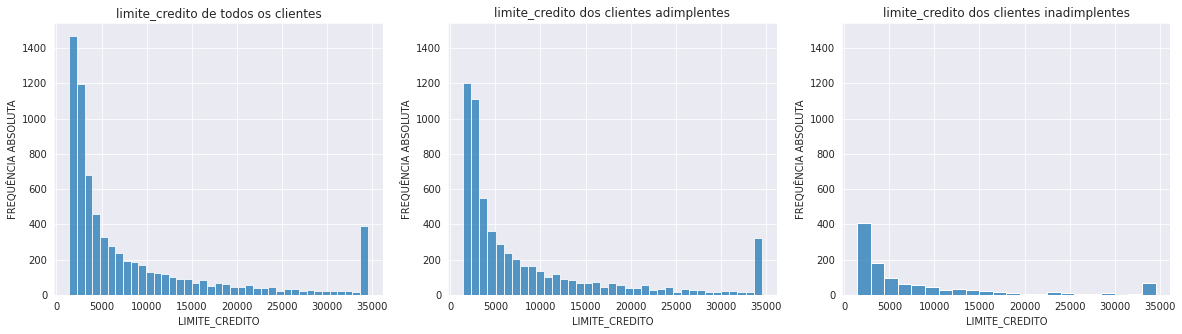

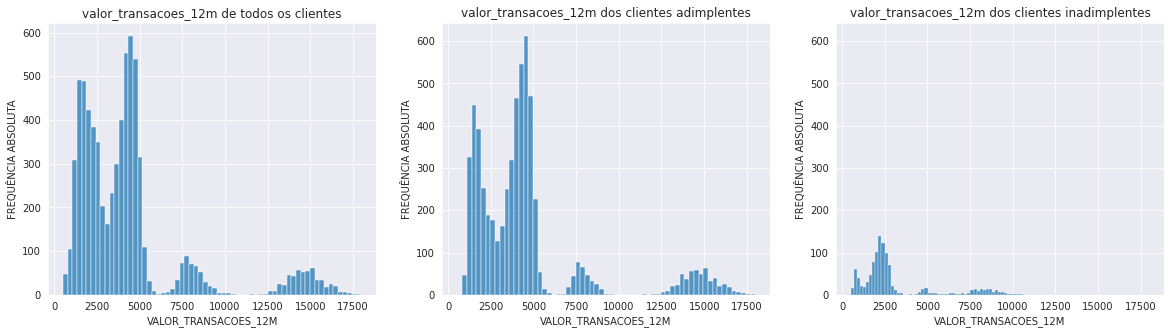

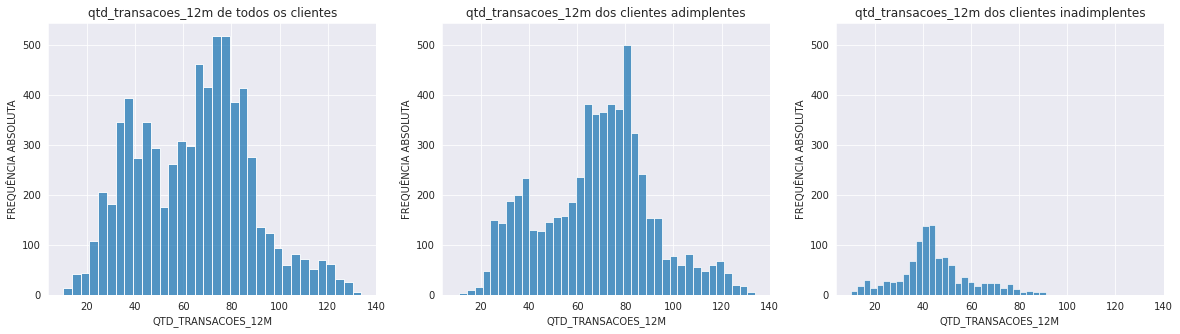

In [44]:
# Visualização:

for coluna in df.drop(labels=['id', 'default'], axis=1).select_dtypes('number'):

  titulos = [
      f'{coluna} de todos os clientes', 
      f'{coluna} dos clientes adimplentes', 
      f'{coluna} dos clientes inadimplentes'
      ]

  eixo = 0
  max_y = 0
  figura, eixos = plt.subplots(
      nrows=1,
      ncols=3, 
      figsize=(20, 5), 
      sharex=True
      )

  for dataframe in [df, df_adimplentes, df_inadimplentes]:

    f = sns.histplot(
        x=coluna, 
        data=dataframe, 
        stat='count', 
        ax=eixos[eixo]
        )
    f.set(
        title=titulos[eixo], 
        xlabel=coluna.upper(), 
        ylabel='FREQUÊNCIA ABSOLUTA'
        )

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

  figura.show()

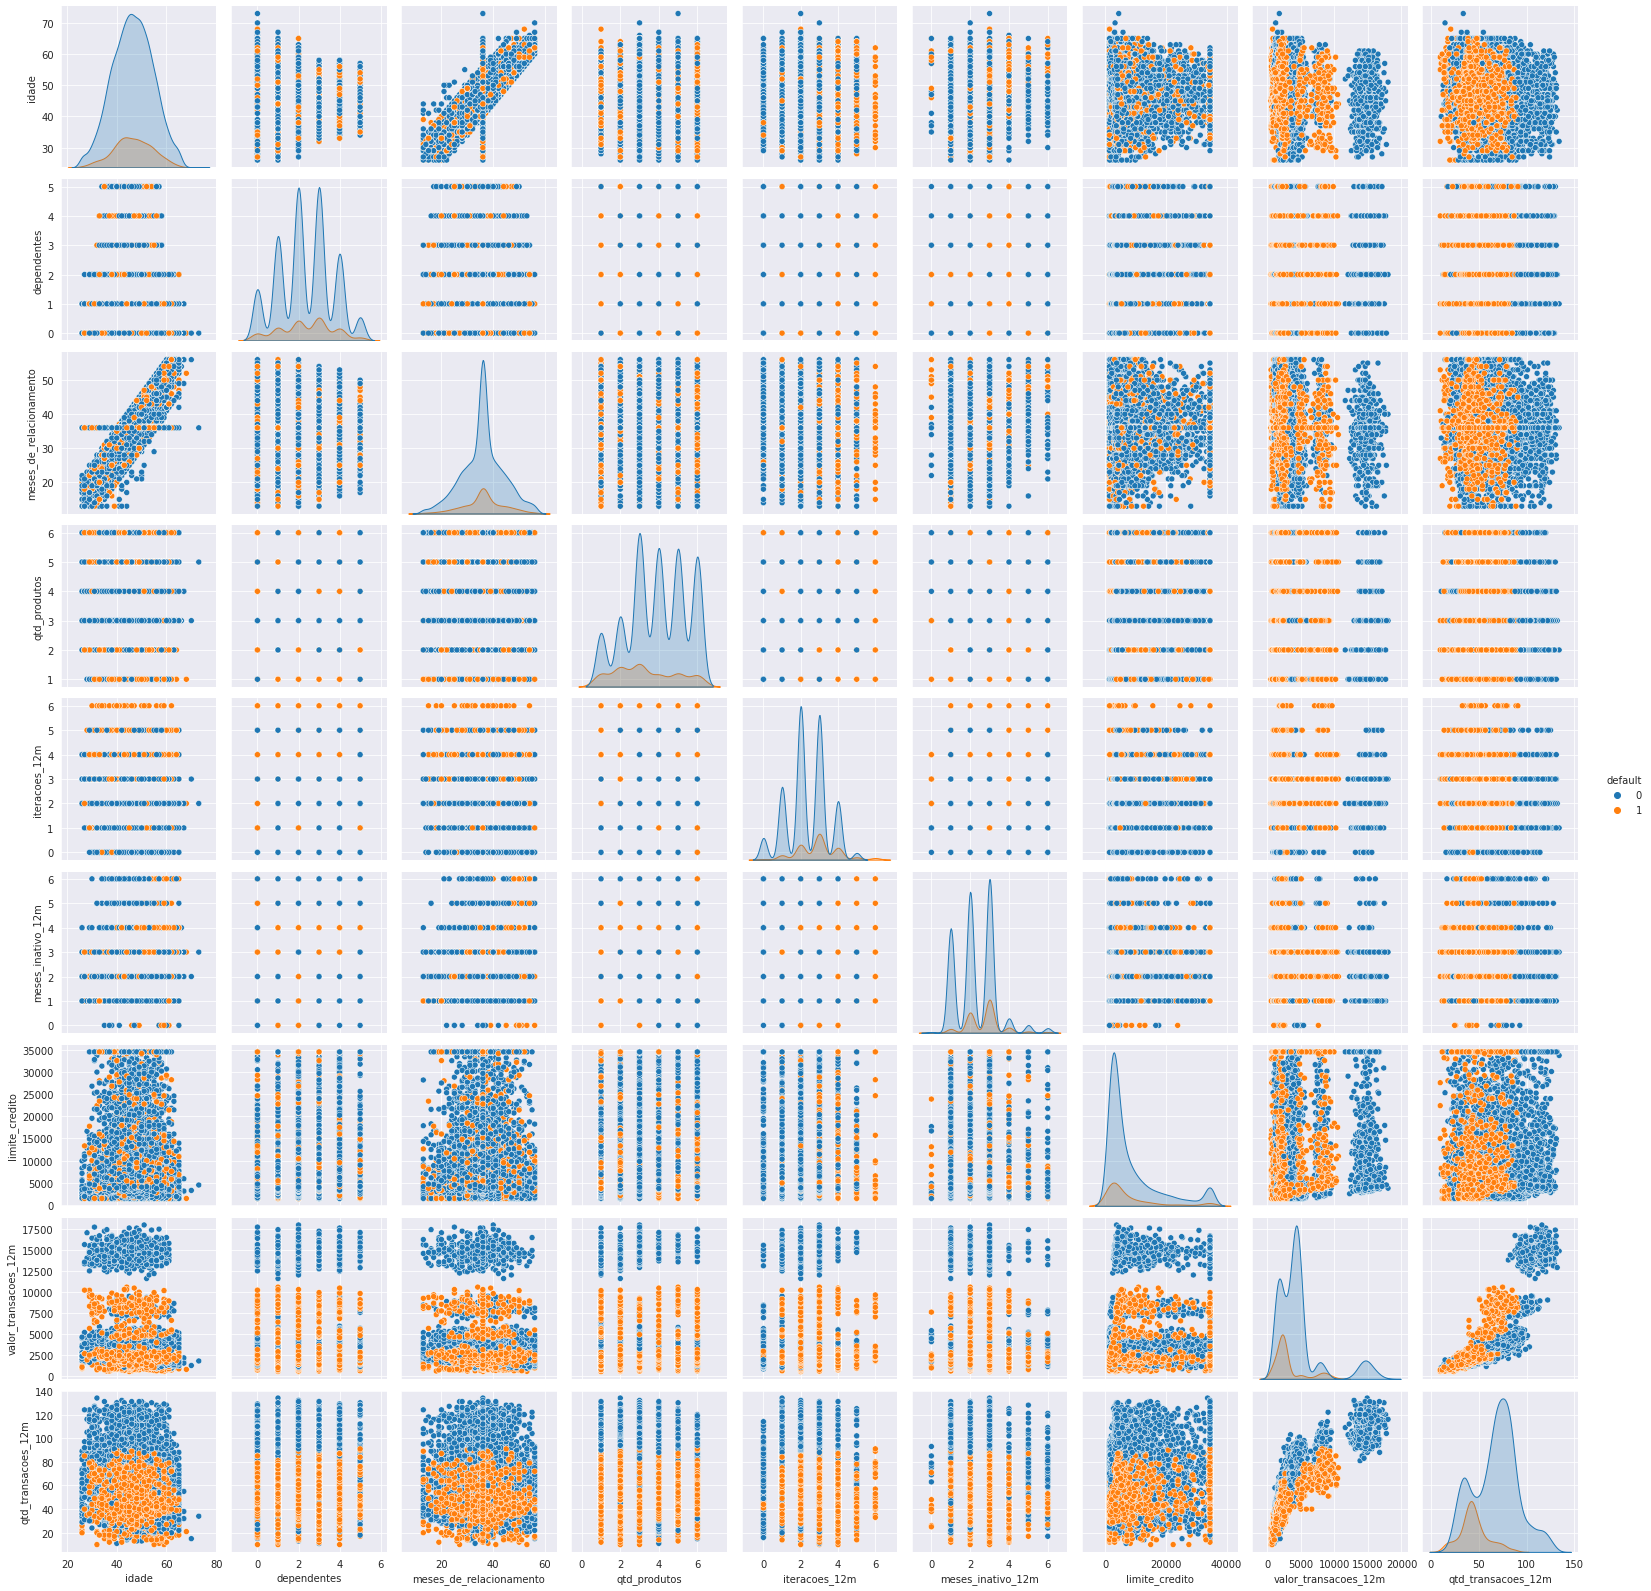

In [45]:
sns.pairplot(data=df.drop(labels='id', axis=1), hue="default")

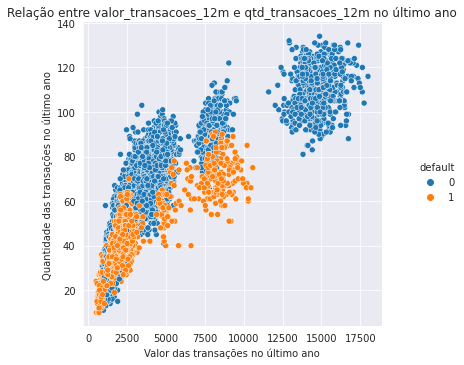

In [46]:
 # Valor das transações nos últimos 12 meses X Quantidade de transações nos últimos 12 meses

f = sns.relplot(
    x='valor_transacoes_12m',
    y='qtd_transacoes_12m',
    data=df,
    hue='default'
    )
_ = f.set(
    title='Relação entre valor_transacoes_12m e qtd_transacoes_12m no último ano',
    xlabel='Valor das transações no último ano',
    ylabel='Quantidade das transações no último ano'
  )

## 7\. Resumo dos *insights* gerados

Chegamos então a algumas conclusões que podem elucidar a inadimplência de pagamentos dos clientes de acordo com os atributos disponibilizados para relacionarmos com a variável resposta.

Alguns destes atributos foram desconsiderados por não apresentarem relevância nos resultados da análise, como é o caso da coluna `id` que somente descreve a conta bancária e não interfere em nenhum resultado de comparação, assim como a coluna `sexo` que por motivos morais não devem ser levadas em consideração nesta análise. 

Exploramos todas as variáveis explicativas tanto de forma independente como em combinação umas com as outras, tendo como principal referência para comparação a variável resposta da coluna `default` que se trata do nosso atributo de interesse e descreve a adimplência ou inadimplência dos clientes.

Abaixo veremos algumas considerações resultantes das análises dos tipos categóricos e numéricos.

### 7.1. Resultados das variáveis do tipo **categórico**

- *`sexo`*: Atributo desconsiderado;

- `escolaridade`: Proporção semelhante entre clientes adimplentes e inadimplentes em relação ao total;

> - **`estado_civil`**: Clientes inadimplentes em maior número quando solteiros;

- `salario_anual`: Proporção semelhante entre clientes adimplentes e inadimplentes em relação ao total;

- `tipo_cartao`: Proporção semelhante entre clientes adimplentes e inadimplentes em relação ao total;

Ao compararmos as variáveis do tipo categórico, é possível notar que a coluna `estado_civil` se destaca das outras análises por apresentar uma leve discrepância entre clientes inadimplentes e os clientes adimplentes.

Os clientes solteiros descritos como inadimplentes se assemelham em quantidade com os clientes casados, diferentemente dos clientes adimplentes que possuem uma quantidade maior de casados do que solteiros, dando a entender que dentre os dados apresentados, os clientes solteiros podem ser mais inadimplentes do que os clientes casados.

Quanto aos outros atributos cetegóricos como escolaridade, salário anual e tipo de cartão, os gráficos demonstram que não interferem na inadimplência de forma considerável por não demonstrarem alguma diferença de comportamento significativa.

### 7.2. Resultados das variáveis do tipo **numérico**

>> - *`id`*: *Atributo desconsiderado*;

> - ***`default`***: **Variável dependente**;

- `idade`: Irrelevante nos resultados;

- `dependentes`: Irrelevante nos resultados;

- `meses_de_relacionamento`: Irrelevante nos resultados;

> - **`qtd_produtos`**: Dos seis produtos que os clientes podem ter contratado, quem possui até três apresenta a taxa de inadimplência mais elevada do que quem possui mais produtos contratados.

> - **`iteracoes_12m`**: Clientes inadimplentes chegaram a ter seis iterações com o banco enquanto os clientes adimplentes tiveram até cinco iterações;

- `meses_inativo_12m`: Irrelevante nos resultados;

- `limite_credito`: Irrelevante nos resultados;

> - **`valor_transacoes_12m`**: Clientes inadimplentes efetuaram transações com valores de até 10.583 enquanto que os clientes adimplentes os valores chegaram até 17.995;

> - **`qtd_transacoes_12m`**: Clientes adimplentes efetuaram até 134 transações (média de 68 transações) com boa parte dos valores na faixa de 15.000. Já os clientes inadimplentes efetuaram no máximo 91 transações (média de 44 transações) com valores menores. A taxa de inadimplência se torna ainda mais elevada entre os clientes que efetuaram em torno de 40 transações no último ano;

Dentro da categoria de variáveis do tipo numérico, quatro colunas destacam resultados relevantes quando comparamos os clientes adimplentes com os clientes inadimplentes juntamente com o conjunto geral que contém dados de ambos valores.

As principais colunas que se destacam por demonstrar discrepâncias consideráveis e ajudar com que tenhamos uma bom *insight* para nossa análise são as colunas de quantidade e valores das transações nos últimos 12 meses que ao relacionarmos as variáveis logo vemos diferentes padrões comportamentais conforme descrito.

### 7.3. Considerações finais

Com esta análise conseguimos classificar possíveis causas da inadimplência através de diferentes características, sejam elas pessoais como é o caso do estado civil que apresenta maior número de clientes inadimplentes quando estão solteiros, ou também comportamentais de acordo com a forma que o cliente utiliza os serviços do banco para movimentações financeiras.

Clientes inadimplentes possuem a quantidade de produtos contratados inferior em comparação com os clientes adimplentes e também efetuaram um número reduzido de transações no último ano com valores menores do que os clientes adimplentes, ou seja, quanto maior o valor e quantidade de transações do cliente, menor é a chance de inadimplência.

Consequêntemente os clientes inadimplentes apresentam maior número de iterações com o banco e curiosamente o salário anual não demonstra interferência considerável na inadimplência.

---